Импортирование необходимых библиотек

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Загрузка файлов для анализа

In [30]:
data_DM = pd.read_csv('diabetes.csv')
data_DM2 = pd.read_csv('test.csv')
data_DM3 = pd.read_csv('train.csv')
data_DM4 = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
data_DM5 = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
data_DM6 = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

информация о содержимом файлов

In [31]:
data_DM.info()
data_DM2.info()
data_DM3.info()
data_DM4.info()
data_DM5.info()
data_DM6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               848 non-null    int64

предподготовка файла , анализ выбросов в данных

In [32]:
data_DM.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


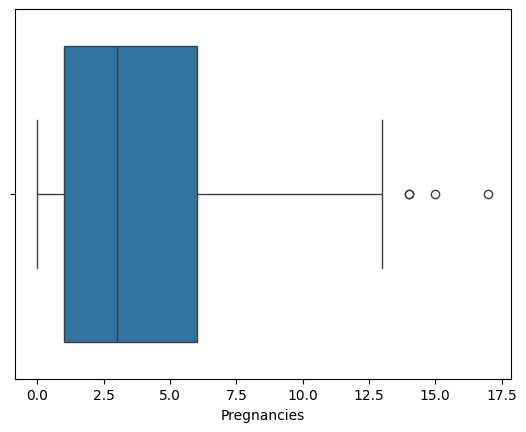

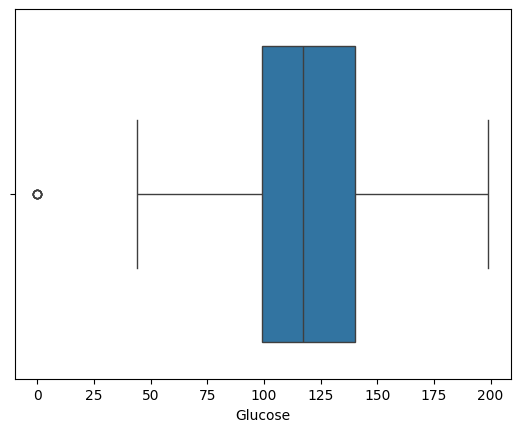

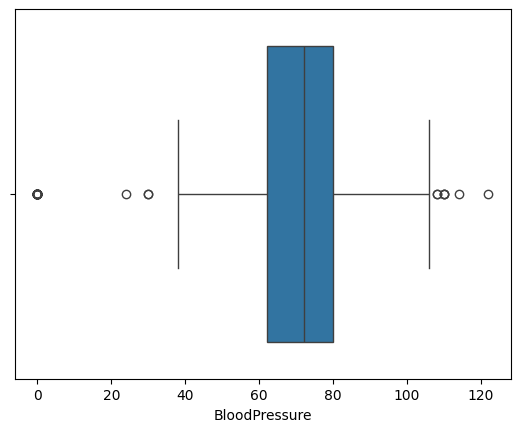

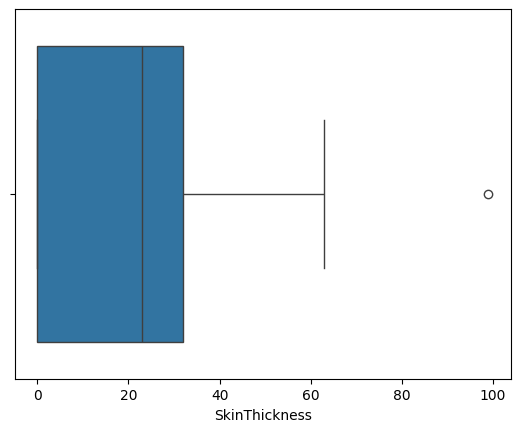

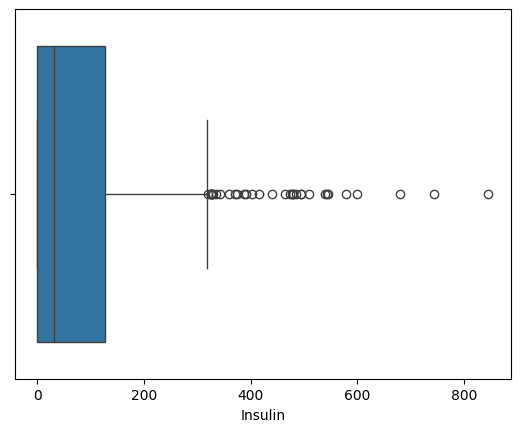

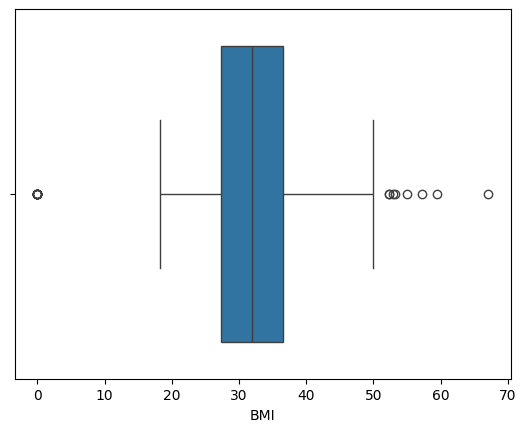

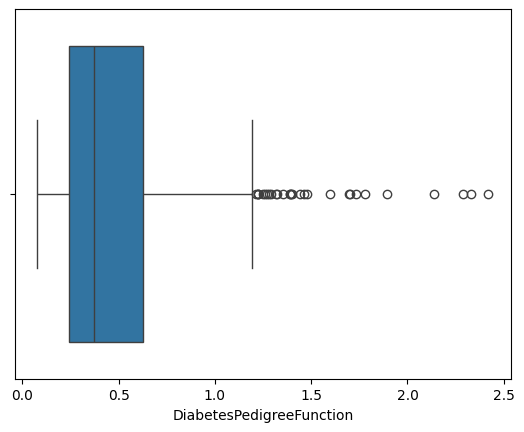

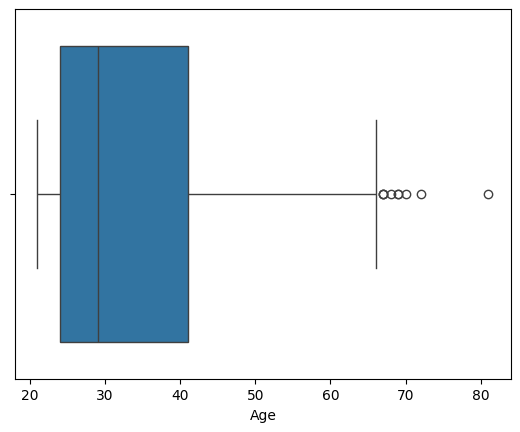

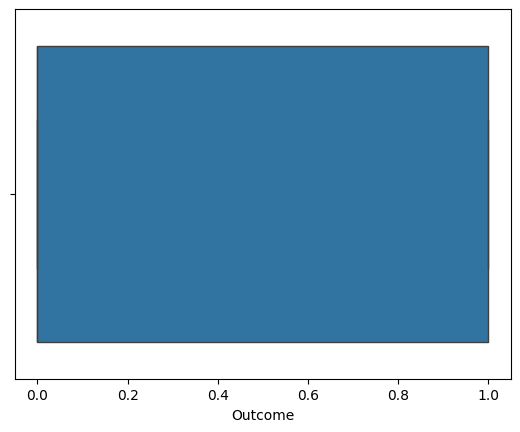

In [25]:
for c in data_DM.columns:
    plt.figure()
    figsize=(5, 4)
    sns.boxplot(x = c, data = data_DM, orient = "h")

In [33]:
data_DM ['diabp'] = data_DM ['BloodPressure'] # переименуем  название столбца в диастолическоеАД

In [34]:
data_DM_renamed = data_DM.rename(columns=lambda name: name.lower()) # приведем к единообразию названия столбцов
data_DM_renamed.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,diabp
0,6,148,72,35,0,33.6,0.627,50,1,72
1,1,85,66,29,0,26.6,0.351,31,0,66
2,8,183,64,0,0,23.3,0.672,32,1,64
3,1,89,66,23,94,28.1,0.167,21,0,66
4,0,137,40,35,168,43.1,2.288,33,1,40


In [36]:
""" Final version of data_DM (№1)"""
data_DM_f = data_DM_renamed.drop(['bloodpressure'], axis=1)
data_DM_f

,pregnancies,glucose,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome,diabp
0,6,148,35,0,33.6,0.627,50,1,72
1,1,85,29,0,26.6,0.351,31,0,66
2,8,183,0,0,23.3,0.672,32,1,64
3,1,89,23,94,28.1,0.167,21,0,66
4,0,137,35,168,43.1,2.288,33,1,40
...,...,...,...,...,...,...,...,...,...
763,10,101,48,180,32.9,0.171,63,0,76
764,2,122,27,0,36.8,0.340,27,0,70
765,5,121,23,112,26.2,0.245,30,0,72
766,1,126,0,0,30.1,0.349,47,1,60


сам анализ данных

In [43]:
data_DM_f['outcome'].value_counts() # cколько диагнозов сахарного диабета

outcome
0    500
1    268
Name: count, dtype: int64

In [46]:
correlation_matrix = data_DM_f.corr() # оценка взаимосязи показателей
print(correlation_matrix)

                          pregnancies   glucose  skinthickness   insulin  \
pregnancies                  1.000000  0.129459      -0.081672 -0.073535   
glucose                      0.129459  1.000000       0.057328  0.331357   
skinthickness               -0.081672  0.057328       1.000000  0.436783   
insulin                     -0.073535  0.331357       0.436783  1.000000   
bmi                          0.017683  0.221071       0.392573  0.197859   
diabetespedigreefunction    -0.033523  0.137337       0.183928  0.185071   
age                          0.544341  0.263514      -0.113970 -0.042163   
outcome                      0.221898  0.466581       0.074752  0.130548   
diabp                        0.141282  0.152590       0.207371  0.088933   

                               bmi  diabetespedigreefunction       age  \
pregnancies               0.017683                 -0.033523  0.544341   
glucose                   0.221071                  0.137337  0.263514   
skinthickness    

In [ ]:
def get_decade_F(age):
    """ Quantitative data preprocessing by using of function """
    if 20 <= age <= 29:
        return 2
    elif 30 <= age <= 39:
        return 3
    elif 40 <= age <= 49:
        return 4
    elif 50 <= age <= 81:
        return 5

data_DM_renamed['decade'] = data_DM_renamed['age'].apply(get_decade_F)
data_DM_renamed['decade'].value_counts()

decade
2    396
3    165
4    118
5     89
Name: count, dtype: int64

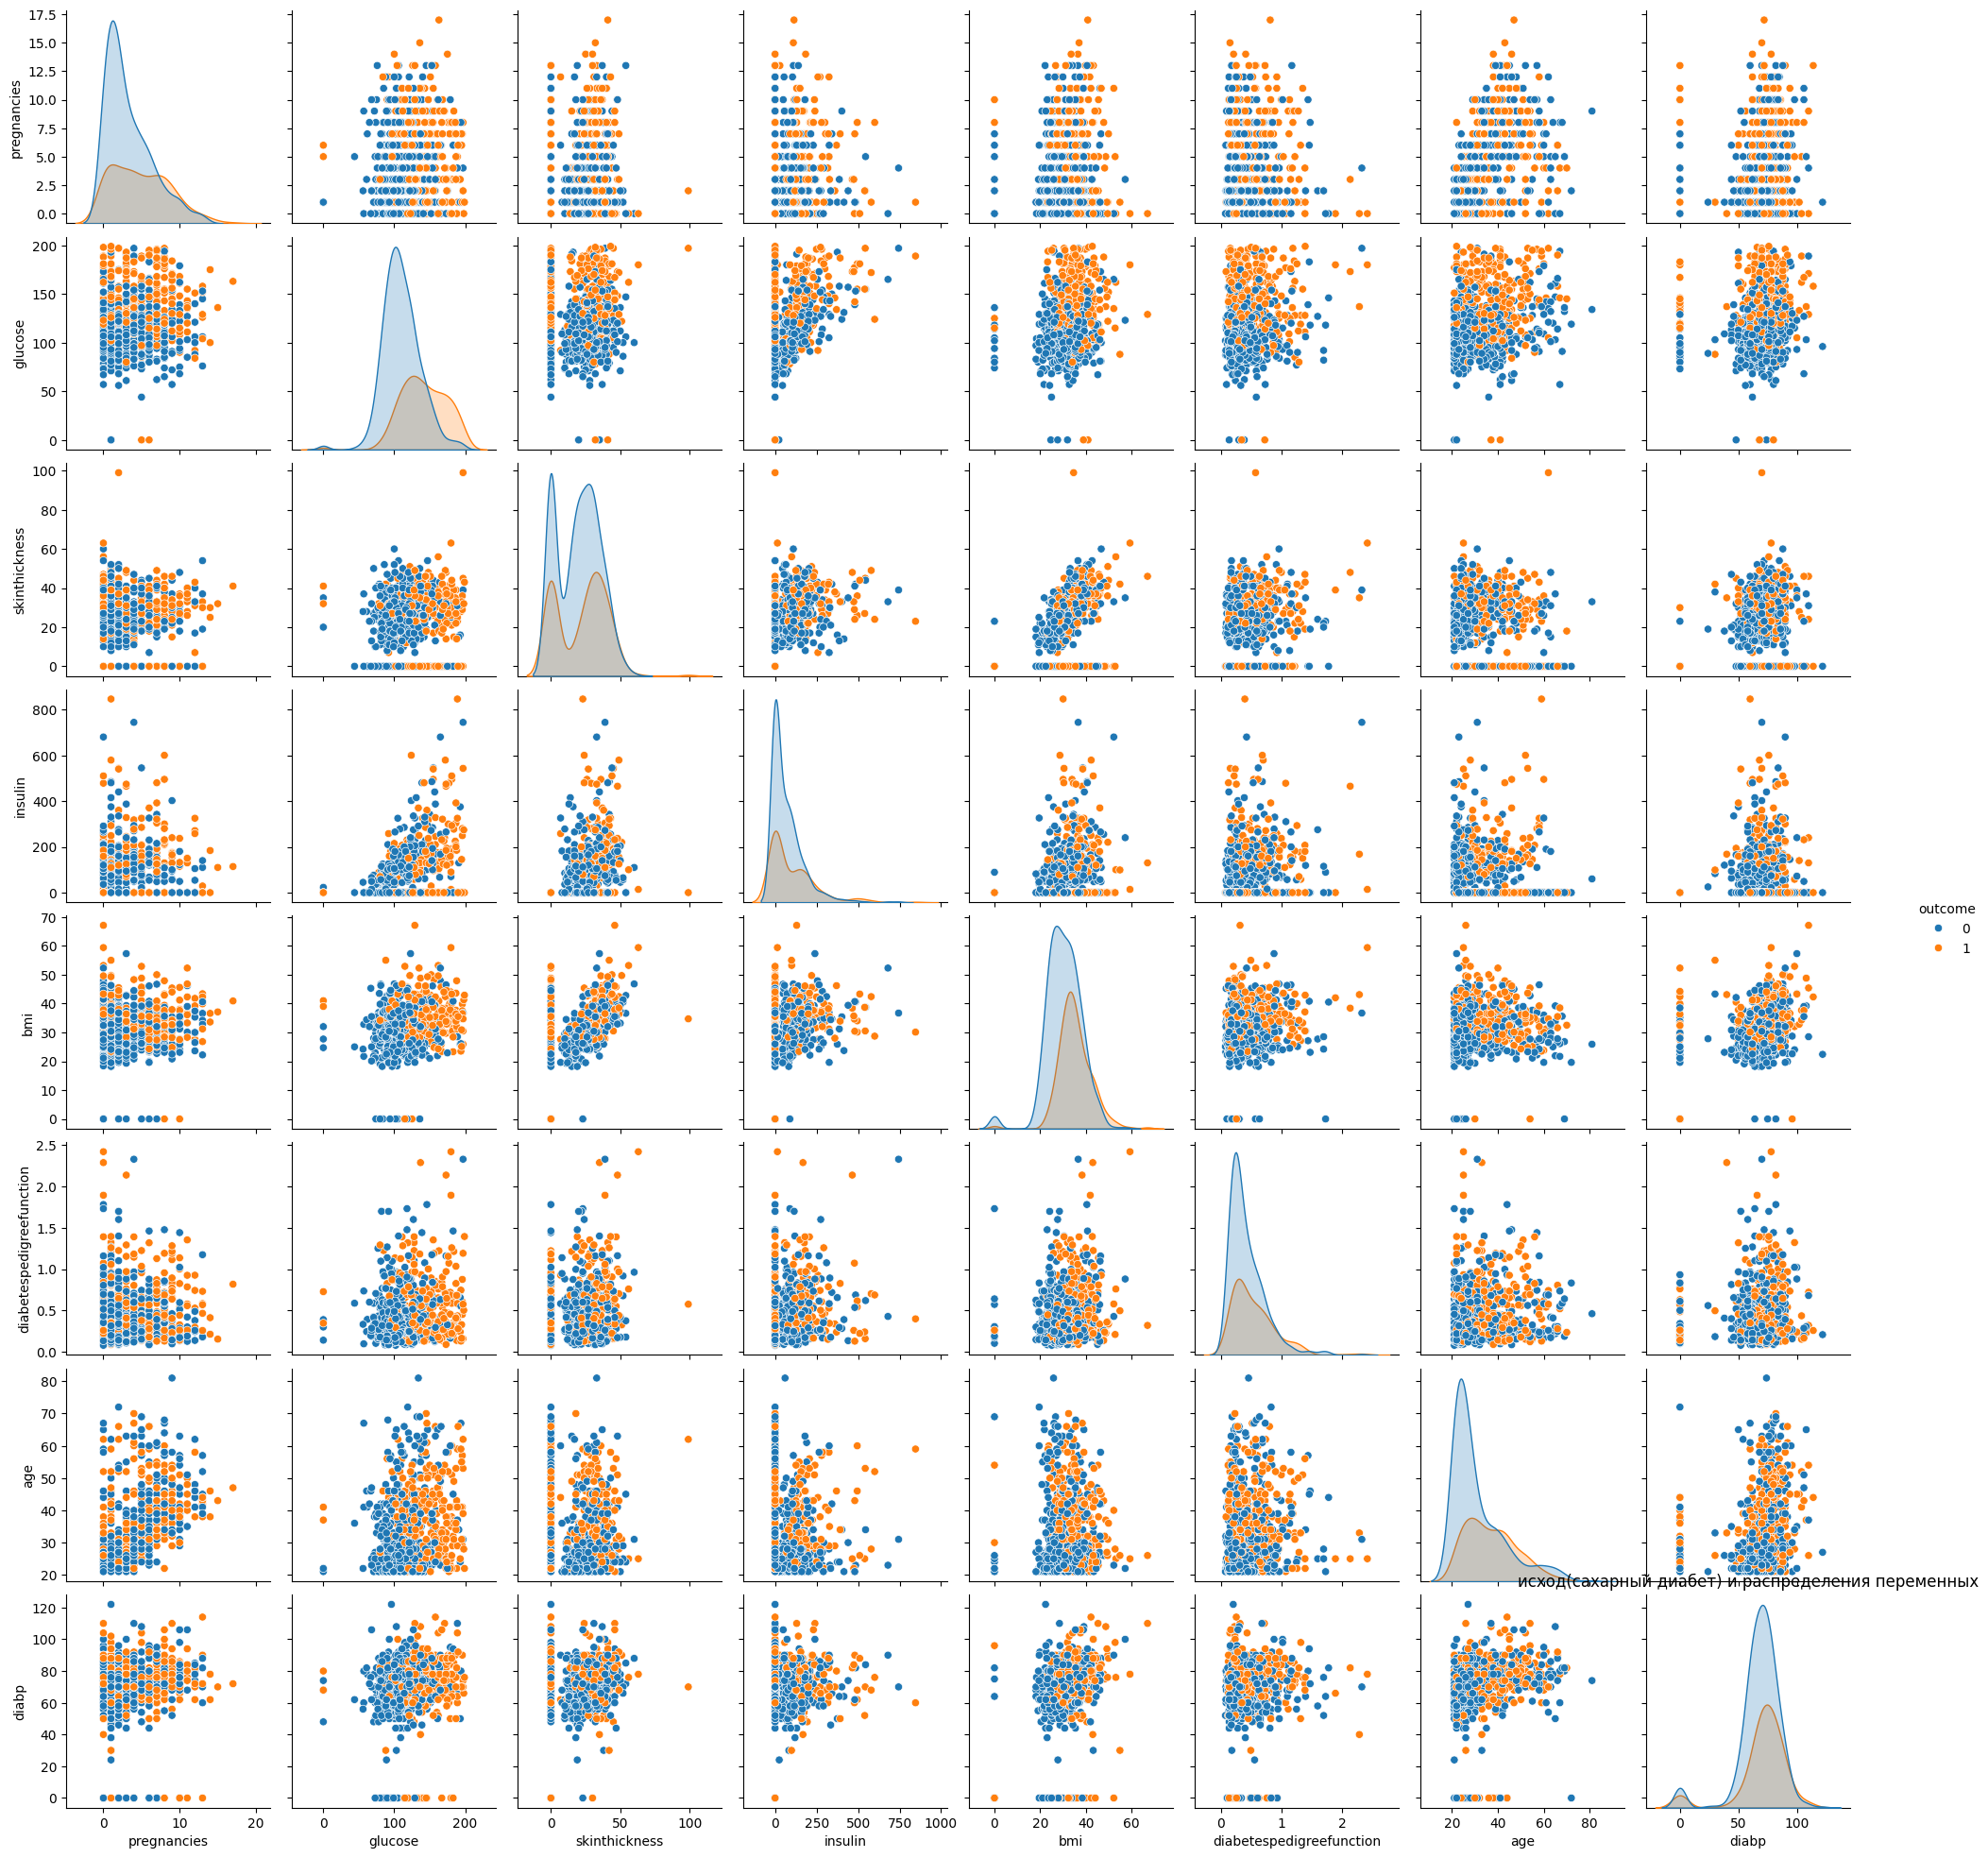

In [40]:
sns.pairplot(data_DM_f, hue ='outcome')
figsize=(9,5)
plt.title('исход(сахарный диабет) и распределения переменных')
plt.show()

In [48]:
risk_factors = ['age','glucose','insulin','skinthickness','diabp','bmi','pregnancies','diabetespedigreefunction']

data_DM_decade = data_DM_renamed.groupby(['outcome', 'decade'], as_index=False)[risk_factors].mean().round(1)   # группировка аггрегированных показателей по исходу(сахарный диабет) и декадам возрастов
data_DM_decade.head(8)

,outcome,decade,age,glucose,insulin,skinthickness,diabp,bmi,pregnancies,diabetespedigreefunction
0,0,2,24.0,106.5,76.1,20.9,65.3,29.9,1.9,0.4
1,0,3,34.1,113.3,75.1,20.0,71.2,30.9,5.0,0.5
2,0,4,43.5,109.5,46.1,19.8,72.9,33.3,6.4,0.4
3,0,5,59.9,127.6,33.1,10.3,76.3,28.7,6.1,0.4
4,1,2,25.4,140.6,115.1,25.7,65.4,37.1,2.2,0.6
5,1,3,34.1,139.3,81.0,20.1,67.9,34.3,4.9,0.6
6,1,4,43.5,137.0,78.4,20.5,74.8,35.7,7.6,0.5
7,1,5,55.5,152.3,138.7,21.4,80.6,32.0,6.0,0.6


In [50]:
""" Convert to summary table to improve comparison """
data_DM_decade_pivot_t = data_DM_renamed.pivot_table(
                 values=risk_factors,
                 index='decade',
                 columns='outcome',
                 aggfunc= 'mean'
        )
data_DM_decade_pivot_t.round(1)

age         bmi       diabetespedigreefunction      diabp        \
outcome     0     1     0     1                        0    1     0     1   
decade                                                                      
2        24.0  25.4  29.9  37.1                      0.4  0.6  65.3  65.4   
3        34.1  34.1  30.9  34.3                      0.5  0.6  71.2  67.9   
4        43.5  43.5  33.3  35.7                      0.4  0.5  72.9  74.8   
5        59.9  55.5  28.7  32.0                      0.4  0.6  76.3  80.6   

        glucose        insulin        pregnancies      skinthickness        
outcome       0      1       0      1           0    1             0     1  
decade                                                                      
2         106.5  140.6    76.1  115.1         1.9  2.2          20.9  25.7  
3         113.3  139.3    75.1   81.0         5.0  4.9          20.0  20.1  
4         109.5  137.0    46.1   78.4         6.4  7.6          19.8  20.5  
5         127.6  152.3    33.1  138.7         6.1  6.0          10.3  21.4

In [ ]:
def get_hdbp(diabp):
  """ Quantitative data preprocessing function using stronger threshold of diastolic BP in  diabetes mellitus """
  if diabp <= 80:
    return 0
  if diabp >  80:
    return 1

data_DM_f['hdbp'] = data_DM_renamed['diabp'].apply(get_hdbp)
data_DM_f['hdbp'].value_counts()

hdbp
0    603
1    165
Name: count, dtype: int64

In [56]:
"""Сompare pregnancy rates in healthy and diastolic hypertensive patients with diabetes mellitus"""
data_DM_unstack = data_DM_f.groupby(['outcome', 'hdbp'])['pregnancies'].mean().round(1).unstack()
data_DM_unstack

hdbp,0,1
outcome,,
0,3.2,3.9
1,4.7,5.2


Заключение_предварительное №1:

 Из 768 женщин( ср. возраст 33[11]лет, ср.уровень глюкозы 121[32]мг/дл, ср. ИМТ=32[8]кг/кв.м ), 268 (35%)заболели сахарным диабетом и у 165 (21%) было повышенное диастолическое АД. Выявлена умеренно положительная связь (r=0.466581) между уровнем глюкозы и диагнозом сахарный диабет, между толщиной кожи и уровнем инсулина(r=0.436783). BMI, возраст и беременность имели максимальный уровень слабоположительной связи с диагнозом СД(r=0.292695, r=0.238356 и r=0.221898, соответственно).

После ранжирования по 10-летним возрастным группам, по сравнению с здоровыми женщинамии аналогичных возрастных групп, лица с СД с среднем во 2ой и 3ей декадах жизни страдали ожирением II степени, имели уровень глюкозы выше нормы(>120 мг/дл). Среди них в 4ой и 5ой возрастной группах диастолическое АД, уровень глюкозы и генетическая анамнестическая предрасположенность к СД были выше, чем у здоровых аналогичного возраста без СД. 

Кроме того повышенный уровень инсулина у самых молодых ( в 2 раза) и самых возрастных (в 4 раза) диабетиков по сравнению со здоровыми, а также утолщение кожи почти в 2 раза у возрасных диабетиков по сравнению со здоровыми аналогичного возраста, вероятнее всего указывает на подключение к лечению современных инсулинов для сахарного диабета I типа у молодых и II типа у возрастных пациентов. В целом число беременностей у здоровых и лиц с СД существенно не различалось. Тем не менее, среди заболевших СД с диастолической гипертонией частота беременностей была выше в 1,6 раз, чем среди здоровых лиц(5 беременностей против 3, соответственно).

In [57]:
data_DM2.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,3394,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN


In [58]:
data_DM2.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
843,4233,46,3.0,F,NO,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0
844,4234,58,2.0,F,NO,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0
845,4235,55,1.0,M,NO,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,NaN
846,4236,45,3.0,F,NO,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.0
847,4237,56,NaN,M,YES,25.0,0.0,0,0,0,255.0,138.0,80.0,23.44,67.0,79.0


In [59]:
"""Pre-processing function for qualitative data"""
sex_map = {'F': 0, 'M': 1}
data_DM2['sex'] = data_DM2['sex'].map(sex_map)

In [60]:
is_smoking_map = {'NO': 1, 'YES': 0}
data_DM2['is_smoking'] = data_DM2['is_smoking'].map(is_smoking_map)

In [61]:
data_DM2_renamed = data_DM2.rename(columns=lambda name: name.lower()) # приведем к единообразию названия столбцов
data_DM2_renamed.head()

,id,age,education,sex,is_smoking,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose
0,3390,43,2.0,1,0,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,3391,56,3.0,0,1,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,3392,58,1.0,0,0,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3393,47,3.0,0,1,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,3394,44,1.0,1,1,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN


In [62]:
data_DM2_renamed.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
id,848.0,3813.500000,244.940809,3390.00,3601.750,3813.5,4025.250,4237.0
age,848.0,49.755896,8.491712,33.00,43.000,49.0,56.000,69.0
education,830.0,2.010843,1.022605,1.00,1.000,2.0,3.000,4.0
sex,848.0,0.415094,0.493029,0.00,0.000,0.0,1.000,1.0
is_smoking,848.0,0.520047,0.499893,0.00,0.000,1.0,1.000,1.0
cigsperday,841.0,8.737218,12.086441,0.00,0.000,0.0,20.000,60.0
bpmeds,839.0,0.028605,0.166794,0.00,0.000,0.0,0.000,1.0
prevalentstroke,848.0,0.003538,0.059409,0.00,0.000,0.0,0.000,1.0
prevalenthyp,848.0,0.291274,0.454617,0.00,0.000,0.0,1.000,1.0
diabetes,848.0,0.025943,0.159060,0.00,0.000,0.0,0.000,1.0


In [63]:
""" Missing data check and its summing """
data_DM2_renamed.isna().sum()

id                  0
age                 0
education          18
sex                 0
is_smoking          0
cigsperday          7
bpmeds              9
prevalentstroke     0
prevalenthyp        0
diabetes            0
totchol            12
sysbp               0
diabp               0
bmi                 5
heartrate           0
glucose            84
dtype: int64

In [64]:
data_DM3.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [65]:
sex_map = {'F': 0, 'M': 1}
data_DM3['sex'] = data_DM3['sex'].map(sex_map)

In [66]:
is_smoking_map = {'NO': 1, 'YES': 0}
data_DM3['is_smoking'] = data_DM3['is_smoking'].map(is_smoking_map)

In [67]:
data_DM3_renamed = data_DM3.rename(columns=lambda name: name.lower()) # приведем к единообразию названия столбцов
data_DM3_renamed.tail()

,id,age,education,sex,is_smoking,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd
3385,3385,60,1.0,0,1,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,0,1,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,1,0,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,1,1,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,0,1,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [68]:
data_DM3_renamed.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
sex,3390.0,0.432743,0.495529,0.00,0.00,0.00,1.00,1.0
is_smoking,3390.0,0.502360,0.500068,0.00,0.00,1.00,1.00,1.0
cigsperday,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
bpmeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentstroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalenthyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0


Выявление пропущенных данных и нулей для оценки пригодности к анализу

In [69]:
data_DM3_renamed.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsperday          22
bpmeds              44
prevalentstroke      0
prevalenthyp         0
diabetes             0
totchol             38
sysbp                0
diabp                0
bmi                 14
heartrate            1
glucose            304
tenyearchd           0
dtype: int64

In [70]:
data_DM3_cop = data_DM3_renamed.copy()

In [71]:
print(data_DM3_cop.shape[0])
print(data_DM2_renamed.shape[0])
print(data_DM3_cop.shape[0]==data_DM2_renamed.shape[0])

3390
848
False


конкотенация данных по строкам

In [72]:
data_DM3_cop_DM2 = pd.concat([data_DM3_cop, data_DM2_renamed], axis=0, join='outer',ignore_index=True)
data_DM3_cop_DM2.info()
display(data_DM3_cop_DM2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   sex              4238 non-null   int64  
 4   is_smoking       4238 non-null   int64  
 5   cigsperday       4209 non-null   float64
 6   bpmeds           4185 non-null   float64
 7   prevalentstroke  4238 non-null   int64  
 8   prevalenthyp     4238 non-null   int64  
 9   diabetes         4238 non-null   int64  
 10  totchol          4188 non-null   float64
 11  sysbp            4238 non-null   float64
 12  diabp            4238 non-null   float64
 13  bmi              4219 non-null   float64
 14  heartrate        4237 non-null   float64
 15  glucose          3850 non-null   float64
 16  tenyearchd       3390 non-null   float64
dtypes: float64(10)

,id,age,education,sex,is_smoking,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd
0,0,64,2.0,0,0,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
1,1,36,4.0,1,1,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,0,0,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,1,0,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,0,0,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,4233,46,3.0,0,1,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0,NaN
4234,4234,58,2.0,0,1,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0,NaN
4235,4235,55,1.0,1,1,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,NaN,NaN
4236,4236,45,3.0,0,1,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.0,NaN


Проверяем на пропуски и дубликаты после объединения

In [73]:
cols_with_null = data_DM3_cop_DM2.isna().sum() # проверяем на пропуски после объединения

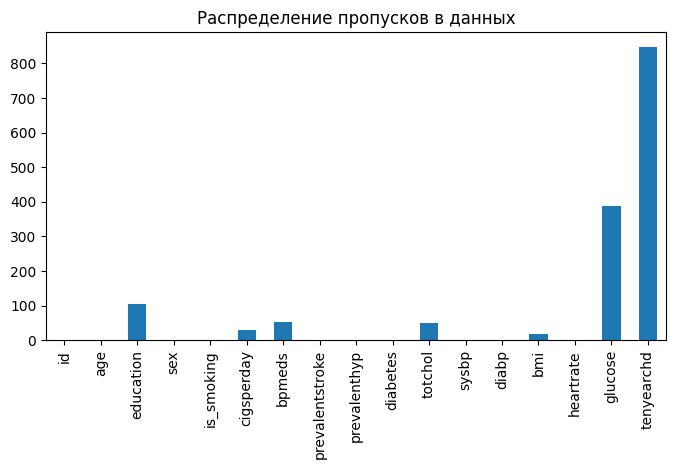

In [74]:
cols_with_null.plot(
    kind='bar',
    figsize=(8, 4),
    title='Распределение пропусков в данных'
);

In [75]:
data_DM3_cop_DM2.duplicated().sum()

np.int64(0)

Предобработка данных перед анализом

In [76]:
data_DM3_cop_DM2['diabetes'].value_counts()

diabetes
0    4129
1     109
Name: count, dtype: int64

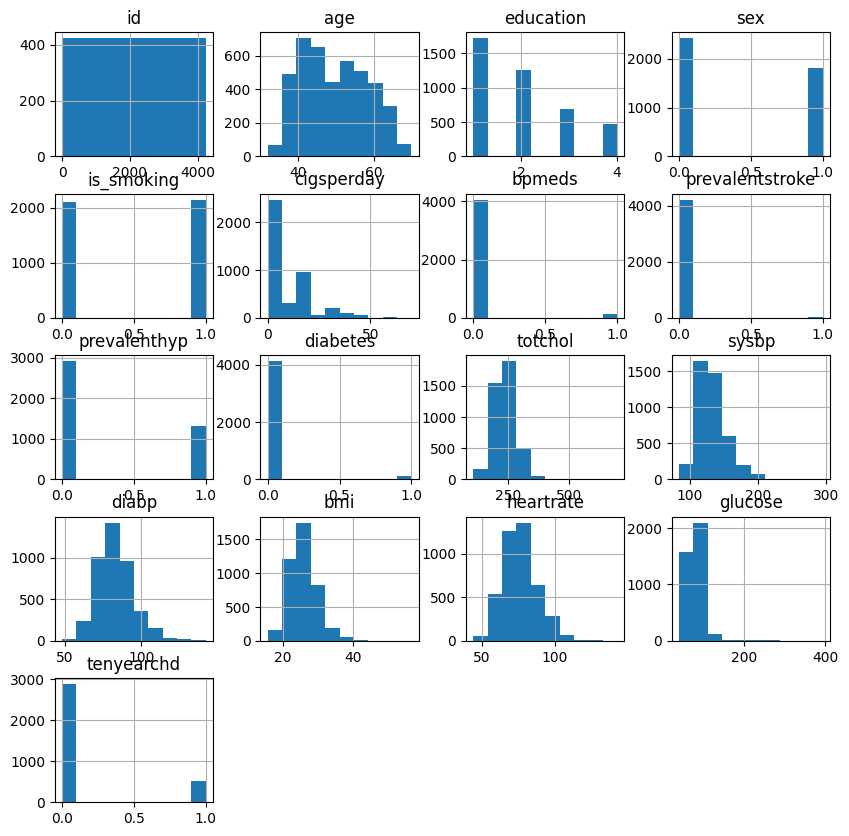

In [77]:
data_DM3_cop_DM2.hist(figsize=(10,10))
plt.show()

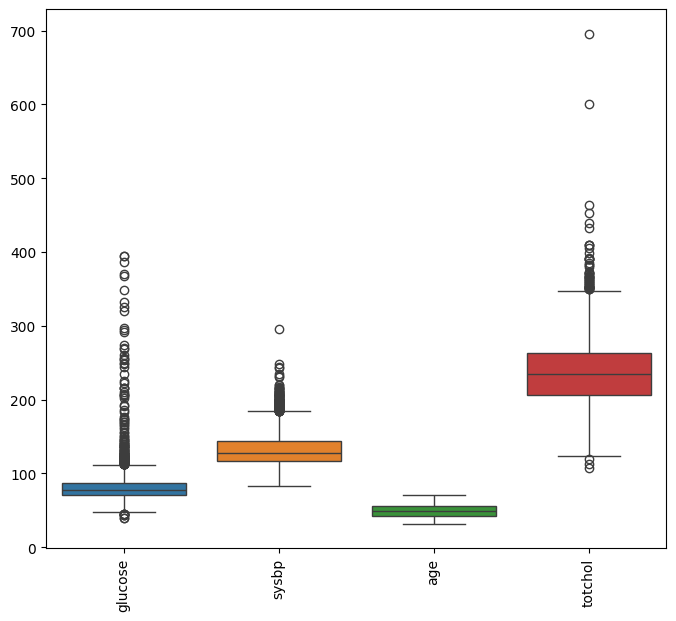

In [ ]:
numeric_columns = ['glucose', 'sysbp', 'age', 'totchol']

"""Create a box plot for numerical columns"""
plt.figure(figsize=(8, 7))
sns.boxplot(data=data_DM3_cop_DM2[numeric_columns])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

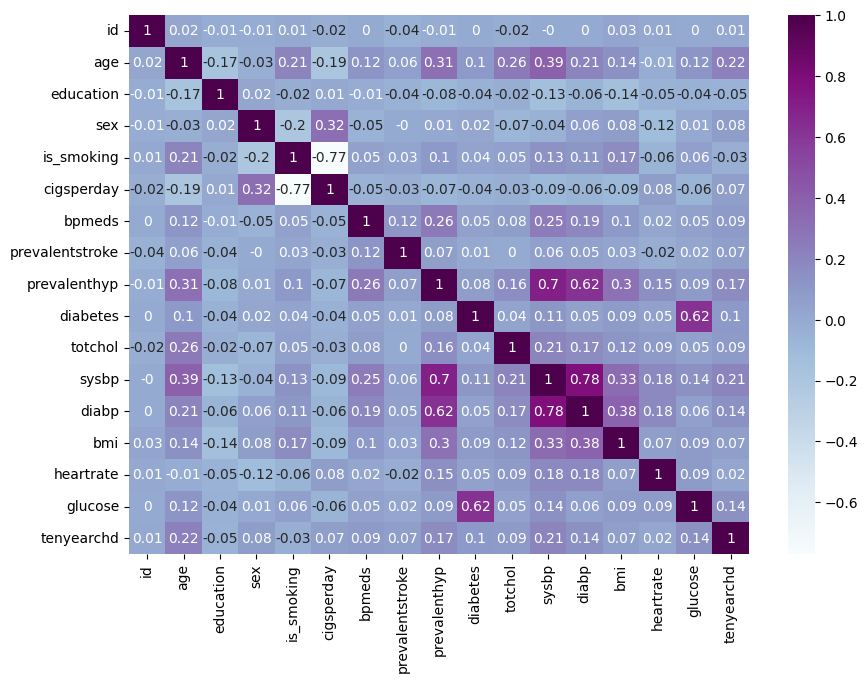

In [79]:
correlation=data_DM3_cop_DM2.corr().round(2)

plt.figure(figsize=(10,7))
sns.heatmap(correlation, annot=True, cmap='BuPu')
plt.show()

In [ ]:
def get_decade_F_M(age):
    """ Quantitative data preprocessing function  by age range for 10years of cardiovascular risk = 10% """      
    if 32 <= age <= 39:
        return 3
    elif 40 <= age <= 49:
        return 4
    elif 50 <= age <= 59:
        return 5
    elif 60 <= age <= 70:
        return 6

data_DM3_cop_DM2['decade'] = data_DM3_cop_DM2['age'].apply(get_decade_F_M)
data_DM3_cop_DM2['decade'].value_counts()

decade
4    1660
5    1333
6     690
3     555
Name: count, dtype: int64

In [ ]:
def get_tchol(totchol):
  """ Pre-processing for reference value setting of total hypercholesterinamia for 10years of cardiovascular risk = 10% """
    if totchol >= 240:
    return 1
  else:
    return 0
  
data_DM3_cop_DM2['tchol_bi'] = data_DM3_cop_DM2['totchol'].apply(get_tchol)
data_DM3_cop_DM2['tchol_bi'].value_counts()

tchol_bi
0    2357
1    1881
Name: count, dtype: int64

In [ ]:
def get_hsbp(sysbp):
  """ Pre-processing for reference value setting of systolic blood pressure for 10years of cardiovascular risk = 10% """
  if sysbp >= 180:
    return 1
  else:
    return 0

data_DM3_cop_DM2['sbp_bi'] = data_DM3_cop_DM2['sysbp'].apply(get_hsbp)
data_DM3_cop_DM2['sbp_bi'].value_counts()

sbp_bi
0    4068
1     170
Name: count, dtype: int64

In [83]:
data_DM3_cop_DM2['outcome'] = data_DM3_cop_DM2['diabetes'] # однообразие названия столбца в первом и объединенном втором дата-сете

анализ данных

In [ ]:
f_risk = ['sysbp','diabp','totchol','glucose','bmi','cigsperday']
""" The relationship of mean values risk factors  and diabetes mellitus  in differans age range"""
data_DM3_cop_DM2_groupby = data_DM3_cop_DM2.groupby(['outcome','decade'], as_index=False)[f_risk].mean().round(1)
data_DM3_cop_DM2_groupby

,outcome,decade,sysbp,diabp,totchol,glucose,bmi,cigsperday
0,0,3,120.2,77.9,214.9,78.1,25.0,10.8
1,0,4,126.7,81.6,230.2,78.3,25.4,11.1
2,0,5,136.7,85.0,247.5,80.5,26.2,7.9
3,0,6,145.7,85.5,248.7,81.6,26.4,5.0
4,1,3,122.2,85.7,204.0,140.3,27.1,6.7
5,1,4,139.3,85.3,225.6,178.8,27.9,12.8
6,1,5,146.2,86.8,264.0,166.7,27.3,4.9
7,1,6,156.5,87.2,246.3,172.0,29.0,3.5


In [85]:
"""The relationship of mean values risk factors and sex  in differans age range"""
data_DM3_cop_DM2_groupby_sex = data_DM3_cop_DM2.groupby(['sex','decade'], as_index=False)[f_risk].mean().round(1)
data_DM3_cop_DM2_groupby_sex

,sex,decade,sysbp,diabp,totchol,glucose,bmi,cigsperday
0,0,3,117.0,75.4,205.5,77.5,23.9,8.0
1,0,4,125.4,80.1,227.9,79.6,24.8,7.5
2,0,5,139.0,85.1,255.6,83.4,26.2,4.4
3,0,6,151.4,87.3,261.0,87.3,27.0,2.5
4,1,3,124.0,81.0,225.8,79.5,26.2,14.2
5,1,4,128.9,83.8,232.9,80.1,26.2,15.8
6,1,5,134.3,84.9,237.7,83.8,26.3,12.4
7,1,6,138.8,83.3,231.1,86.1,25.9,8.3


In [86]:
"""The relationship of mean and median number of cigarettes smoked to gender and diabetes mellitus """
data_DM3_cop_DM2_p_t_sex = data_DM3_cop_DM2.pivot_table(
    values='cigsperday',
    index='outcome',
    columns='sex',
    aggfunc=['mean','median']
)
data_DM3_cop_DM2_p_t_sex

mean            median      
sex             0          1      0     1
outcome                                  
0        5.731572  13.551626    0.0  15.0
1        5.228070   7.461538    0.0   0.0

In [87]:
"""The relationship of mean and median systolic BP values to gender and diabetes mellitus """
data_DM3_cop_DM2_p_t_bp = data_DM3_cop_DM2.pivot_table(
    values='sysbp',
    index='outcome',
    columns='sex',
    aggfunc=['mean','median']
)
data_DM3_cop_DM2_p_t_bp

mean             median        
sex               0           1      0       1
outcome                                       
0        132.535775  131.176287  128.0  128.00
1        153.938596  140.326923  150.0  135.25

In [88]:
"""The relationship of mean and median  BMI values  to gender and diabetes mellitus """
data_DM3_cop_DM2_p_t_bmi = data_DM3_cop_DM2.pivot_table(
    values='bmi',
    index='outcome',
    columns='sex',
    aggfunc=['mean','median']

)
data_DM3_cop_DM2_p_t_bmi

mean             median       
sex              0          1       0      1
outcome                                     
0        25.441741  26.148429  24.710  26.05
1        28.486429  27.472549  28.085  27.52

In [89]:
"""The relationship of mean and meadian diastolic BP values to gender and 10years cardiovascularrisk """
data_DM3_cop_DM2_p_t_risk = data_DM3_cop_DM2.pivot_table(
    values='diabp',
    index='tenyearchd',
    columns='sex',
    aggfunc=['mean','median']
)
data_DM3_cop_DM2_p_t_risk

mean            median      
sex                 0          1      0     1
tenyearchd                                   
0.0         81.641627  82.973222   80.5  82.0
1.0         86.658996  86.854779   85.0  85.0

In [90]:
"""The relationship of mean and systolic BP values to gender and 10years cardiovascularrisk """
data_DM3_cop_DM2_p_t_risk = data_DM3_cop_DM2.pivot_table(
    values='sysbp',
    index='tenyearchd',
    columns='sex',
    aggfunc=['mean','median']
)
data_DM3_cop_DM2_p_t_risk

mean             median       
sex                  0           1      0      1
tenyearchd                                      
0.0         131.451010  129.410042  127.0  127.0
1.0         146.558577  141.477941  143.0  137.5

Заключение_предварительное №2:
В объединенной выборке n= 4238 (мужщин - 42%, ср. возраст 50[9]лет, ср.уровень глюкозы 82[24]мг/дл, ср. ИМТ=26[4]кг/кв.м ), 108 (2.5%)имели сахарный диабет и у 31% была артериальная гипертония(АГ). Выявлена умеренно положительная связь (r=0.62) между уровнем глюкозы и диагнозом сахарный диабет.

После ранжирования по 10-летним возрастным группам, по сравнению с здоровыми лицами аналогичных возрастных групп, лица с СД с среднем имели АГ более выраженную у женщин в возрасте 60+, тогда как при наличае СД АГ была более выражена у мужщин.

Чрезмерное курение было характерно для мужщин без СД всех возрастынх групп, тогда как наличие СД сопровождалось 2-3 кратным снижением числа сигарет в день за исключением молодых мужщин диабетиков 40-49 лет, которые еще продолжали использовать более 10 сигарет в день. Среди диабетиков обоих полов в этой возрастной группе был самый высокий уровень глюкозы в крови(178 мг\дл).

В целом выборка представлена средним возрасным составом преимущественно здоровых лиц и характеризуется низким долей (15%) 10летнего ССриска >= 10%.

In [91]:
data_DM4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [92]:
data_DM4.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [93]:
data_DM4.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [95]:
data_DM5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [96]:
data_DM5.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [97]:
data_DM5.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.0,1.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0


In [98]:
data_DM6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [99]:
data_DM6.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [100]:
data_DM6.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [ ]:
""" Data_DM4 and data_DM6 differed only by format  values first colomn, we can joined data sets data_DM6 and data_DM5 """

data_DM6_DM5 = pd.concat([data_DM6, data_DM5], axis=0, join='outer',ignore_index=True)
data_DM6_DM5.info()
display(data_DM6_DM5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324372 entries, 0 to 324371
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       324372 non-null  float64
 1   HighBP                324372 non-null  float64
 2   HighChol              324372 non-null  float64
 3   CholCheck             324372 non-null  float64
 4   BMI                   324372 non-null  float64
 5   Smoker                324372 non-null  float64
 6   Stroke                324372 non-null  float64
 7   HeartDiseaseorAttack  324372 non-null  float64
 8   PhysActivity          324372 non-null  float64
 9   Fruits                324372 non-null  float64
 10  Veggies               324372 non-null  float64
 11  HvyAlcoholConsump     324372 non-null  float64
 12  AnyHealthcare         324372 non-null  float64
 13  NoDocbcCost           324372 non-null  float64
 14  GenHlth               324372 non-null  float64
 15  

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324367,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
324368,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
324369,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
324370,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [110]:
data_DM6_DM5.duplicated().sum()

np.int64(94898)

In [111]:
data_DM6_DM5.drop_duplicates()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [113]:
data_DM6_DM5_renamed = data_DM6_DM5.rename(columns=lambda name: name.lower()) # приведем к единообразию названия столбцов
data_DM6_DM5_renamed.head(1)

,diabetes_binary,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0


In [118]:
data_DM6_DM5_renamed.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
diabetes_binary,324372.0,0.217935,0.412844,0.0,0.0,0.0,0.0,1.0
highbp,324372.0,0.458304,0.498259,0.0,0.0,0.0,1.0,1.0
highchol,324372.0,0.446259,0.497104,0.0,0.0,0.0,1.0,1.0
cholcheck,324372.0,0.965413,0.182731,0.0,1.0,1.0,1.0,1.0
bmi,324372.0,28.703735,6.749545,12.0,24.0,27.0,32.0,98.0
smoker,324372.0,0.450165,0.497511,0.0,0.0,0.0,1.0,1.0
stroke,324372.0,0.045278,0.207914,0.0,0.0,0.0,0.0,1.0
heartdiseaseorattack,324372.0,0.105872,0.307675,0.0,0.0,0.0,0.0,1.0
physactivity,324372.0,0.744882,0.435928,0.0,0.0,1.0,1.0,1.0
fruits,324372.0,0.629361,0.482977,0.0,0.0,1.0,1.0,1.0


In [114]:
data_DM6_DM5_pivot_t = data_DM6_DM5_renamed.pivot_table(
                 values='bmi',
                 index='diabetes_binary',
                 columns='highbp',
                 aggfunc= 'mean'
        )
data_DM6_DM5_pivot_t.round(1)

highbp,0.0,1.0
diabetes_binary,,
0.0,26.9,29.2
1.0,30.4,32.4


In [116]:
data_DM6_DM5_p_t_dur_H = data_DM6_DM5_renamed.pivot_table(
                 values='age',
                 index='diabetes_binary',
                 columns='highbp',
                 aggfunc= 'mean'
        )
data_DM6_DM5_p_t_dur_H.round(1)

highbp,0.0,1.0
diabetes_binary,,
0.0,7.0,9.1
1.0,8.7,9.6


age - demografic index 5-year range  of  ages in population: 
1 == Age 18-24 , 2==25-29, 3==30-34, 4==35-39, 5==40-44, 6==45-49 , 7==50-54, 8==55-59 9==60-64, 10==65-69, 11==70-74, 12==75-79, 13 == 80 or older;
14 == missing - unkown- refuset data 

In [129]:
data_DM6_DM5_renamed['age'].value_counts()

age
9.0     43356
10.0    43050
8.0     39435
7.0     33186
11.0    31577
6.0     24467
13.0    22789
12.0    21374
5.0     19677
4.0     16616
3.0     13172
2.0      8994
1.0      6679
Name: count, dtype: int64

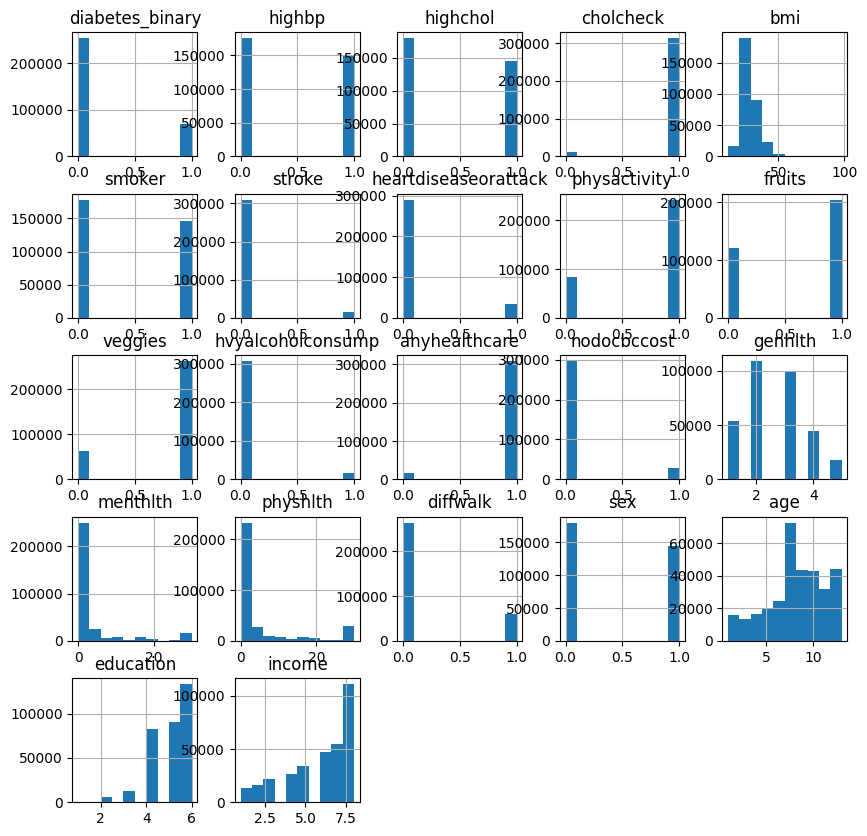

In [121]:
data_DM6_DM5_renamed.hist(figsize=(10,10))
plt.show()

In [124]:
data_DM6_DM5_p_t_S = data_DM6_DM5_renamed.pivot_table(
                 values='age',
                 index='diabetes_binary',
                 columns='stroke',
                 aggfunc= 'mean'
        )
data_DM6_DM5_p_t_S.round(1)

stroke,0.0,1.0
diabetes_binary,,
0.0,7.7,9.9
1.0,9.3,10.0


In [123]:
data_DM6_DM5_p_t_MI = data_DM6_DM5_renamed.pivot_table(
                 values='age',
                 index='diabetes_binary',
                 columns='heartdiseaseorattack',
                 aggfunc= 'mean'
        )
data_DM6_DM5_p_t_MI.round(1)

heartdiseaseorattack,0.0,1.0
diabetes_binary,,
0.0,7.6,10.1
1.0,9.2,10.1


In [ ]:
data_DM6_DM5_p_t_PA = data_DM6_DM5_renamed.pivot_table(
                 values='age',
                 index='diabetes_binary',
                 columns='physactivity',
                 aggfunc= 'mean'
        )
data_DM6_DM5_p_t_PA.round(1)


physactivity,0.0,1.0
diabetes_binary,,
0.0,8.3,7.7
1.0,9.5,9.3


In [134]:
f_risk_old = ['education','income','menthlth','physhlth']
data_DM6_DM5_renamed_groupby = data_DM6_DM5_renamed.groupby(['age', 'diabetes_binary'])[f_risk_old]. median().round(1)
data_DM6_DM5_renamed_groupby

education  income  menthlth  physhlth
age  diabetes_binary                                       
1.0  0.0                    5.0     6.0       0.0       0.0
     1.0                    5.0     5.5       1.0       0.0
2.0  0.0                    6.0     6.0       0.0       0.0
     1.0                    5.0     4.0       2.0       1.5
3.0  0.0                    6.0     7.0       0.0       0.0
     1.0                    5.0     6.0       0.0       1.0
4.0  0.0                    6.0     7.0       0.0       0.0
     1.0                    5.0     5.0       0.0       1.0
5.0  0.0                    6.0     8.0       0.0       0.0
     1.0                    5.0     6.0       0.0       2.0
6.0  0.0                    5.0     8.0       0.0       0.0
     1.0                    5.0     6.0       0.0       2.0
7.0  0.0                    5.0     7.0       0.0       0.0
     1.0                    5.0     6.0       0.0       2.0
8.0  0.0                    5.0     7.0       0.0       0.0
     1.0                    5.0     6.0       0.0       2.0
9.0  0.0                    5.0     7.0       0.0       0.0
     1.0                    5.0     6.0       0.0       2.0
10.0 0.0                    5.0     7.0       0.0       0.0
     1.0                    5.0     6.0       0.0       1.0
11.0 0.0                    5.0     6.0       0.0       0.0
     1.0                    5.0     5.0       0.0       0.0
12.0 0.0                    5.0     6.0       0.0       0.0
     1.0                    5.0     5.0       0.0       0.0
13.0 0.0                    5.0     5.0       0.0       0.0
     1.0                    5.0     5.0       0.0       0.0

MentHlth : стресс, депрессию и проблемы с эмоциями, в течение скольких дней за последние 30 дней ваше психическое здоровье было не в порядке? (0 ~ 30)

PhysHlth : физические заболевания и травмы, в течение скольких дней за последние 30 дней ваше физическое здоровье было не в порядке? (0 ~ 30)

In [136]:
""" Convert to summary table to improve comparison """
data_DM6_DM5_renamed_pivot_t = data_DM6_DM5_renamed.pivot_table(
                 values=f_risk_old,
                 index='age',
                 columns='diabetes_binary',
                 aggfunc= 'median'
        )
data_DM6_DM5_renamed_pivot_t.round(1)

education      income      menthlth      physhlth     
diabetes_binary       0.0  1.0    0.0  1.0      0.0  1.0      0.0  1.0
age                                                                   
1.0                   5.0  5.0    6.0  5.5      0.0  1.0      0.0  0.0
2.0                   6.0  5.0    6.0  4.0      0.0  2.0      0.0  1.5
3.0                   6.0  5.0    7.0  6.0      0.0  0.0      0.0  1.0
4.0                   6.0  5.0    7.0  5.0      0.0  0.0      0.0  1.0
5.0                   6.0  5.0    8.0  6.0      0.0  0.0      0.0  2.0
6.0                   5.0  5.0    8.0  6.0      0.0  0.0      0.0  2.0
7.0                   5.0  5.0    7.0  6.0      0.0  0.0      0.0  2.0
8.0                   5.0  5.0    7.0  6.0      0.0  0.0      0.0  2.0
9.0                   5.0  5.0    7.0  6.0      0.0  0.0      0.0  2.0
10.0                  5.0  5.0    7.0  6.0      0.0  0.0      0.0  1.0
11.0                  5.0  5.0    6.0  5.0      0.0  0.0      0.0  0.0
12.0                  5.0  5.0    6.0  5.0      0.0  0.0      0.0  0.0
13.0                  5.0  5.0    5.0  5.0      0.0  0.0      0.0  0.0

Заключение 3 
В объединенной выборке n= 324372 (мужщин - 44%, ср. возраст 55-59лет, ср. ИМТ=29[7]кг/кв.м ), 44% -курильщиков, 22% имели сахарный диабет, у 46% было повышенное давление, 4% перенесли мозговой инсульт, 10% - инфаркты миокарда.  Психологические проблемы доминировали на проблемами физического здоровья. 81% были вегетарианцами. О физическая активность заявили 75% выборки.
После ранжирования по 5-летним возрастным группам, по сравнению с здоровыми лицами аналогичных возрастных групп, лица с СД с среднем имели больший ИМТ (32,4 против 26,9). Сочетание СД и повышенного АД чаще было в 60-64 года против здоровых лиц 50-54 лет.  Инсульты и сердечные приступы  чаще были у 60-74 летних диабетиков с повышенным давлением в отличие от более молодых лиц (50-54 года) без данной комбинацией заболеваний. 

Более высокое образование и доход были антирисками сахарного диабета. Молодые диабетики испытовали  чаще проблемы со стрессом и деппресией, чем возрастные. Среди здоровых лиц любого возраста психологических проблем в течении 1 мес не было. Физические проблемы были характеры для 40-64 летних диабетиков, в отличие от здоровых , у которых таких проблем за 1 мес не было.

В целом выборка представлена средним и старшим возрасным составом лиц, в котором более 50% имели высокий уровень образоваия и доходов. Ожирение, артериальная гипертония, психологические проблемы были характерны для пациентов страдающих СД. 

Выводы:
1. во всех возрастных группах ожирение сопровождалось наличием сахарного диабета
2. повышенный уровень глюкозы, общего холестерина, артериального давления среди диабетиков с возрастом становились выраженней.
3. у здороых по сравнению с больными сахарным диабетам более высокий уровень образования и доходов был среди лиц до 45 лет.  